In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [322]:
# Simulate two distributions

# Number of trials
N = 100

# Dataset A
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
DataA = 26-r*10


# Dataset B
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
DataB = 30-r*10

## Mix trials together

# Concatenate trials
alldata = np.hstack((DataA,DataB))

# Condition labels
conds = np.hstack((np.ones(N),2*np.ones(N)))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2.]


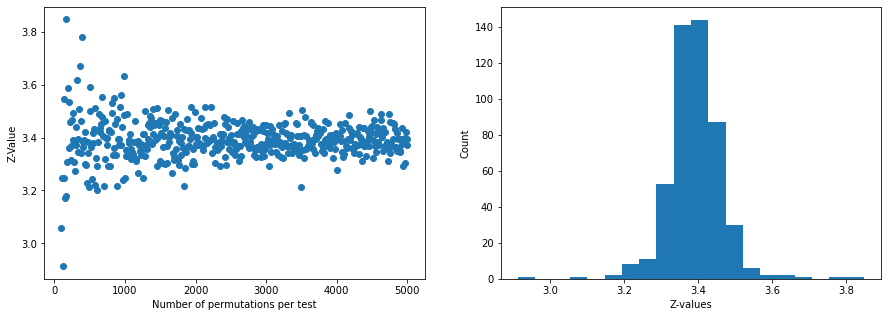

In [496]:
# Create a distribution of null hypothesis values

nPerms = np.arange(100,5001,10)
zVals = []

for perm in nPerms:
    permdiffs = np.zeros(perm)

    for permi in range(perm):
        fconds = np.random.permutation(N*2)
        fconds[fconds<N] = 1
        fconds[fconds>1] = 2
        permdiffs[permi] = np.mean(alldata[fconds==2]) - np.mean(alldata[fconds==1])
        
    obsval = np.mean(alldata[conds==2]) - np.mean(alldata[conds==1])
        
    zVal = (obsval - np.mean(permdiffs)) / np.std(permdiffs,ddof=1)
    zVals.append(zVal)
#     print(np.shape(zVal))
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].scatter(nPerms,zVals)
ax[0].set_xlabel('Number of permutations per test')
ax[0].set_ylabel('Z-Value')

ax[1].hist(zVals,bins=20)
ax[1].set_xlabel('Z-values')
ax[1].set_ylabel('Count')
plt.show()